## Neural networks can be challenging due to high number of parameters and tuning process which can be solved using methods including Bayesian optimization. However, the right choice of optimizer would be critical. In this post, I have compared multiple optimizers with adaptive learning rate and the effect of learning rate and batch size for a simple neural network.

In [1]:
# Loading Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib as mpl
import seaborn as sns
sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
np.random.seed(1367)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print "Number of training samples: %d"%train_features.shape[0]
print "Number of test samples: %d"%test_features.shape[0]
print "Image rows: %d"%train_features.shape[1]
print "Image columns: %d"%train_features.shape[2]
print "Number of classes: %d"%num_classes

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


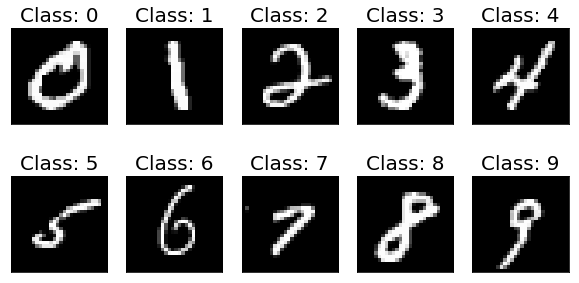

In [13]:
fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Class: " + str(i) , fontsize = 20)
    plt.imshow(features_idx[1], cmap="gray")
plt.savefig("./mnist.png" , bbox_inches='tight')
plt.show()

In [14]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [2]:
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model

In [16]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [17]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

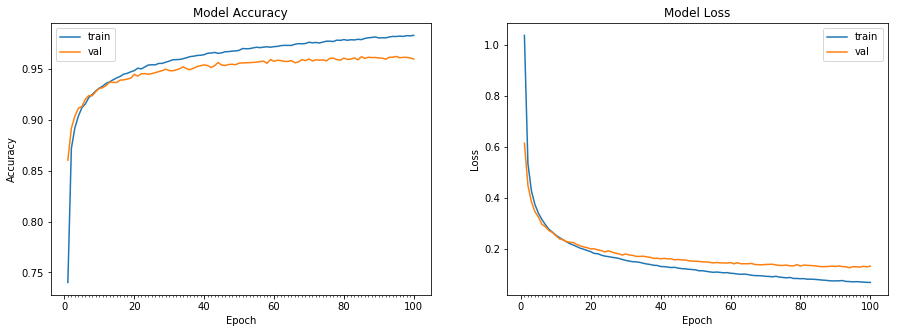

SGD Model took 102.65 seconds to train
SGD Accuracy on test data is: 94.28


In [22]:
# decrease the learning rate
# define model
model_sgd = simple_nn()
model_sgd.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_sgd = model_sgd.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_sgd)
print "SGD Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

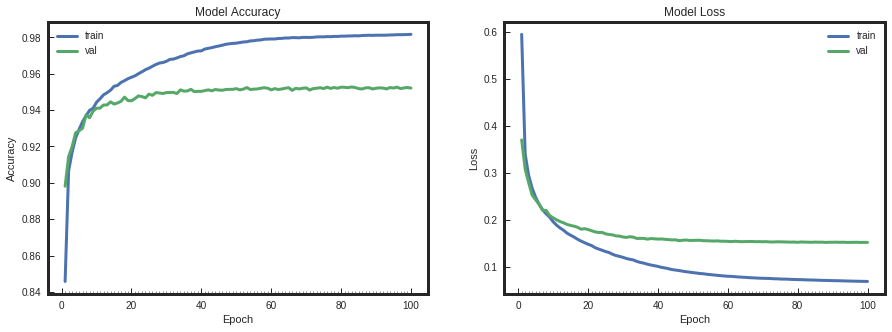

Adagrad Model took 166.58 seconds to train
adagrad Accuracy on test data is: 94.28


In [33]:
# decrease the learning rate
# define model
model_adagrad = simple_nn()
model_adagrad.compile(optimizer="Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adagrad = model_adagrad.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adagrad)
print "Adagrad Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "adagrad Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

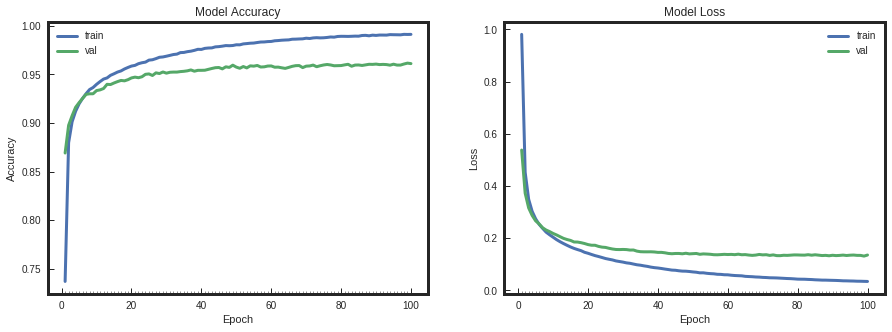

Adadelta Model took 176.11 seconds to train
adadelta Accuracy on test data is: 94.28


In [56]:
# decrease the learning rate
# define model
model_adadelta = simple_nn()
model_adadelta.compile(optimizer="Adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adadelta = model_adadelta.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adadelta)
print "Adadelta Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "adadelta Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

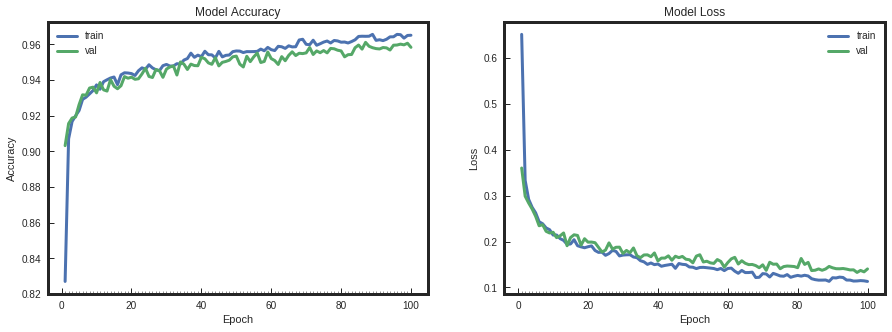

Adam Model took 189.46 seconds to train
Adam Accuracy on test data is: 94.28


In [64]:
# decrease the learning rate
# define model
model_adam = simple_nn()
model_adam.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adam = model_adam.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adam)
print "Adam Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Adam Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

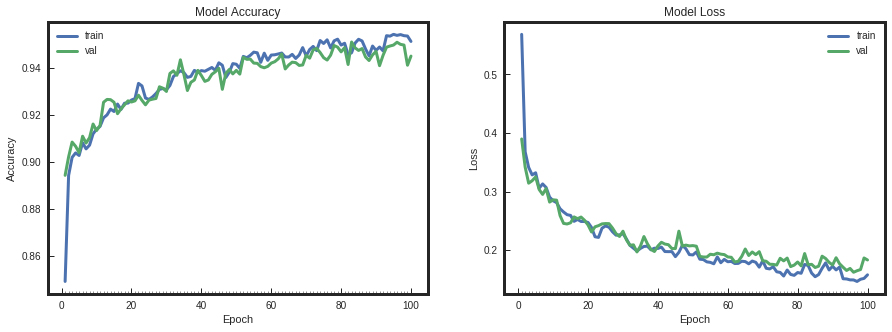

Nadam Model took 260.45 seconds to train
Nadam Accuracy on test data is: 94.52


In [71]:
# decrease the learning rate
# define model
model_nadam = simple_nn()
model_nadam.compile(optimizer="Nadam", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_nadam = model_nadam.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_nadam)
print "Nadam Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Nadam Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_nadam)

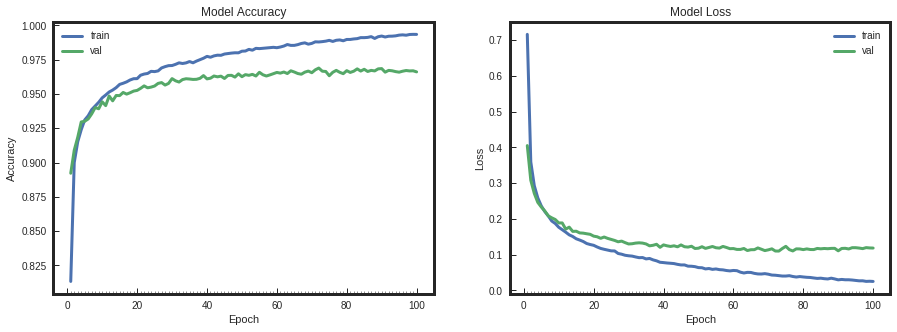

Nadam Model took 184.97 seconds to train
Adamax Accuracy on test data is: 96.61


In [78]:
# decrease the learning rate
# define model
model_adamax = simple_nn()
model_adamax.compile(optimizer="Adamax", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax = model_adamax.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax)
print "Nadam Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Adamax Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax)

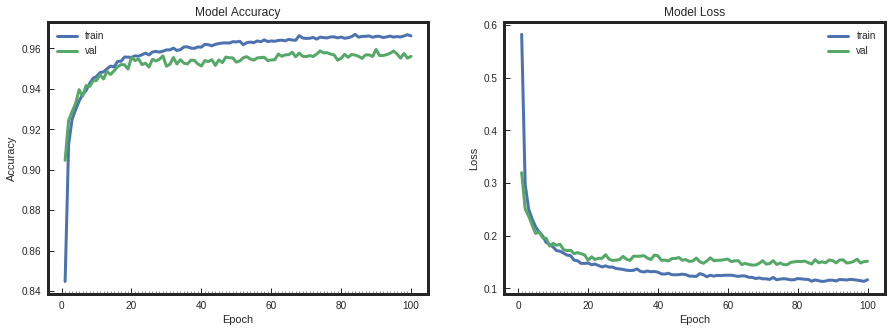

RMSprop Model took 172.51 seconds to train
RMSprop Accuracy on test data is: 95.61


In [81]:
# decrease the learning rate
# define model
model_rmsprop = simple_nn()
model_rmsprop.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_rmsprop = model_rmsprop.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_rmsprop)
print "RMSprop Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "RMSprop Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_rmsprop)

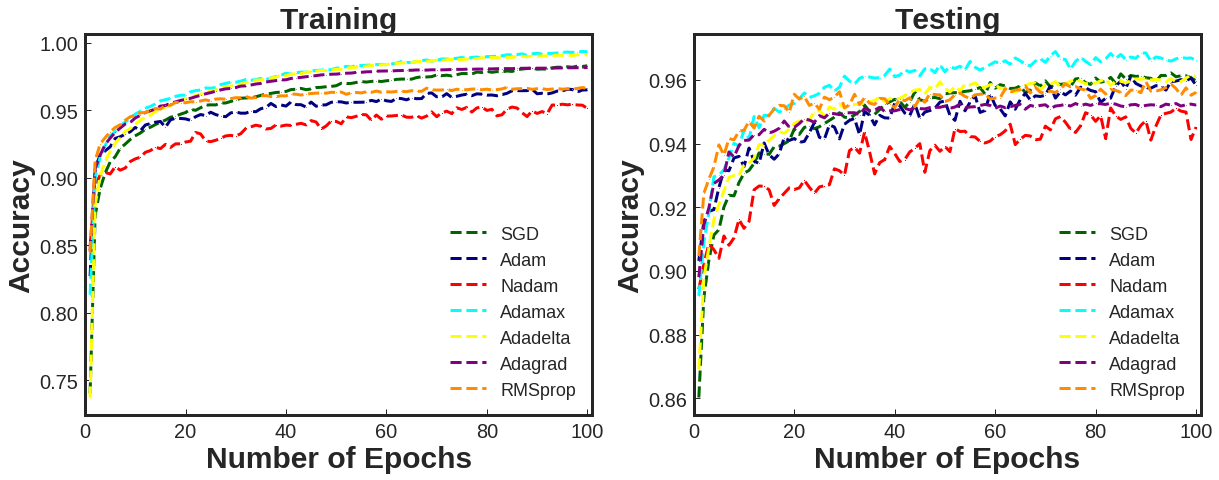

In [83]:
# Plot with Error bars
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.errorbar(range(1,len(model_info_sgd.history['acc'])+1),model_info_sgd.history['acc'] ,color = "DarkGreen", linestyle = "--" , marker = "v" , label = "SGD")
plt.errorbar(range(1,len(model_info_adam.history['acc'])+1),model_info_adam.history['acc'] ,color = "navy", linestyle = "--" , marker = "^" , label = "Adam")
plt.errorbar(range(1,len(model_info_nadam.history['acc'])+1),model_info_nadam.history['acc'] ,color = "red", linestyle = "--" , marker = "s" , label = "Nadam")
plt.errorbar(range(1,len(model_info_adamax.history['acc'])+1),model_info_adamax.history['acc'] ,color = "cyan", linestyle = "--" , marker = "h" , label = "Adamax")
plt.errorbar(range(1,len(model_info_adadelta.history['acc'])+1),model_info_adadelta.history['acc'] ,color = "yellow", linestyle = "--" , marker = ">" , label = "Adadelta")
plt.errorbar(range(1,len(model_info_adagrad.history['acc'])+1),model_info_adagrad.history['acc'],color = "purple", linestyle = "--" , marker = "<" , label = "Adagrad")
plt.errorbar(range(1,len(model_info_rmsprop.history['acc'])+1),model_info_rmsprop.history['acc'] ,color = "darkorange", linestyle = "--" , marker = "o" , label = "RMSprop")

plt.title("Training" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("Accuracy" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 4)


plt.subplot(1,2,2)
plt.errorbar(range(1,len(model_info_sgd.history['val_acc'])+1),model_info_sgd.history['val_acc'] ,color = "DarkGreen", linestyle = "--" , marker = "v" , label = "SGD")
plt.errorbar(range(1,len(model_info_adam.history['val_acc'])+1),model_info_adam.history['val_acc'] ,color = "navy", linestyle = "--" , marker = "^" , label = "Adam")
plt.errorbar(range(1,len(model_info_nadam.history['val_acc'])+1),model_info_nadam.history['val_acc']  ,color = "red", linestyle = "--" , marker = "s" , label = "Nadam")
plt.errorbar(range(1,len(model_info_adamax.history['val_acc'])+1),model_info_adamax.history['val_acc']  ,color = "cyan", linestyle = "--" , marker = "h" , label = "Adamax")
plt.errorbar(range(1,len(model_info_adadelta.history['val_acc'])+1),model_info_adadelta.history['val_acc'],color = "yellow", linestyle = "--" , marker = ">" , label = "Adadelta")
plt.errorbar(range(1,len(model_info_adagrad.history['val_acc'])+1),model_info_adagrad.history['val_acc'],color = "purple", linestyle = "--" , marker = "<" , label = "Adagrad")
plt.errorbar(range(1,len(model_info_rmsprop.history['val_acc'])+1),model_info_rmsprop.history['val_acc'],color = "darkorange", linestyle = "--" , marker = "o" , label = "RMSprop")

plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("Accuracy" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 4)

plt.savefig("./score_all.png" , bbox_inches='tight')
plt.show()

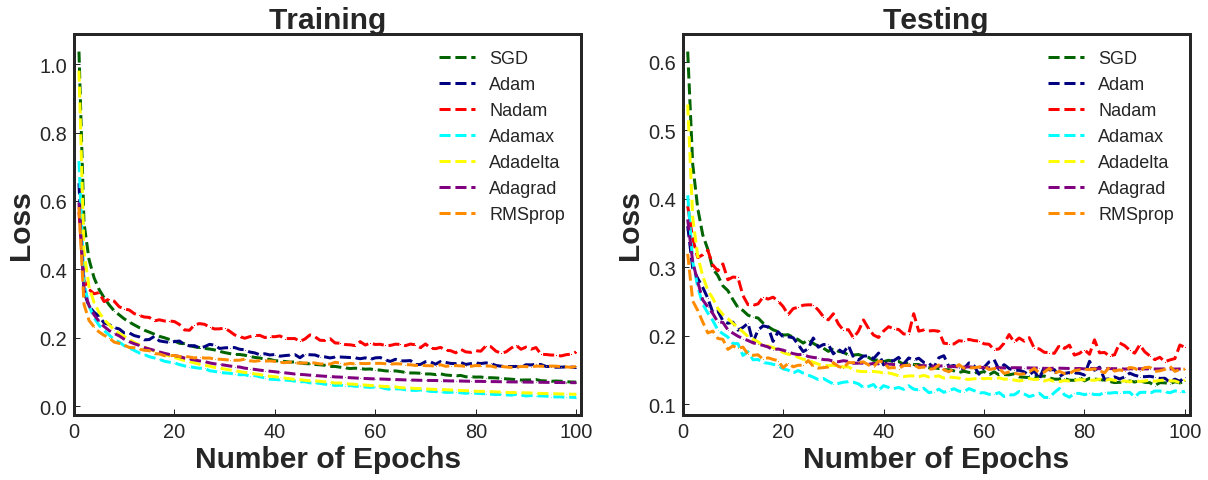

In [85]:
# Plot with Error bars
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.errorbar(range(1,len(model_info_sgd.history['loss'])+1),model_info_sgd.history['loss'] ,color = "DarkGreen", linestyle = "--" , marker = "v" , label = "SGD")
plt.errorbar(range(1,len(model_info_adam.history['loss'])+1),model_info_adam.history['loss'] ,color = "navy", linestyle = "--" , marker = "^" , label = "Adam")
plt.errorbar(range(1,len(model_info_nadam.history['loss'])+1),model_info_nadam.history['loss'],color = "red", linestyle = "--" , marker = "s" , label = "Nadam")
plt.errorbar(range(1,len(model_info_adamax.history['loss'])+1),model_info_adamax.history['loss'] ,color = "cyan", linestyle = "--" , marker = "h" , label = "Adamax")
plt.errorbar(range(1,len(model_info_adadelta.history['loss'])+1),model_info_adadelta.history['loss'] ,color = "yellow", linestyle = "--" , marker = ">" , label = "Adadelta")
plt.errorbar(range(1,len(model_info_adagrad.history['loss'])+1),model_info_adagrad.history['loss'],color = "purple", linestyle = "--" , marker = "<" , label = "Adagrad")
plt.errorbar(range(1,len(model_info_rmsprop.history['loss'])+1),model_info_rmsprop.history['loss'],color = "darkorange", linestyle = "--" , marker = "o" , label = "RMSprop")

plt.title("Training" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.subplot(1,2,2) 
plt.errorbar(range(1,len(model_info_sgd.history['val_loss'])+1),model_info_sgd.history['val_loss'] ,color = "DarkGreen", linestyle = "--" , marker = "v" , label = "SGD")
plt.errorbar(range(1,len(model_info_adam.history['val_loss'])+1),model_info_adam.history['val_loss'] ,color = "navy", linestyle = "--" , marker = "^" , label = "Adam")
plt.errorbar(range(1,len(model_info_nadam.history['val_loss'])+1),model_info_nadam.history['val_loss'],color = "red", linestyle = "--" , marker = "s" , label = "Nadam")
plt.errorbar(range(1,len(model_info_adamax.history['val_loss'])+1),model_info_adamax.history['val_loss'],color = "cyan", linestyle = "--" , marker = "h" , label = "Adamax")
plt.errorbar(range(1,len(model_info_adadelta.history['val_loss'])+1),model_info_adadelta.history['val_loss'],color = "yellow", linestyle = "--" , marker = ">" , label = "Adadelta")
plt.errorbar(range(1,len(model_info_adagrad.history['val_loss'])+1),model_info_adagrad.history['val_loss'],color = "purple", linestyle = "--" , marker = "<" , label = "Adagrad")
plt.errorbar(range(1,len(model_info_rmsprop.history['val_loss'])+1),model_info_rmsprop.history['val_loss'],color = "darkorange", linestyle = "--" , marker = "o" , label = "RMSprop")

plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.savefig("./loss_all.png" ,bbox_inches='tight')
plt.show()


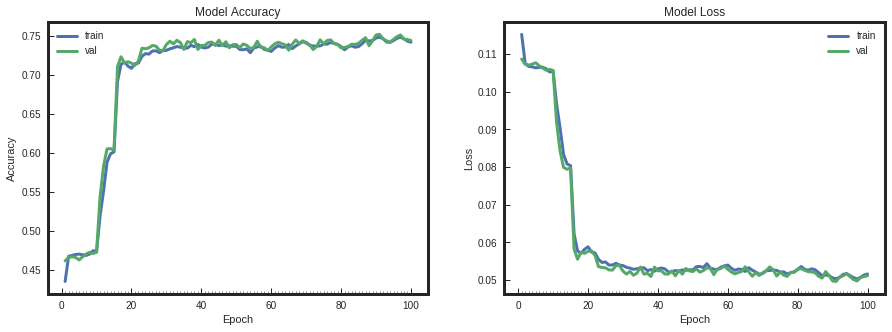

 Model took 277.18 seconds to train
Accuracy on test data is: 74.45


In [112]:
# decrease the learning rate
# define model
import keras
adamax_lr1 = keras.optimizers.Adamax(lr=0.1)
model_adamax_lr01 = simple_nn()
model_adamax_lr01.compile(optimizer=adamax_lr1, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr01 = model_adamax_lr01.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr01)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr01)

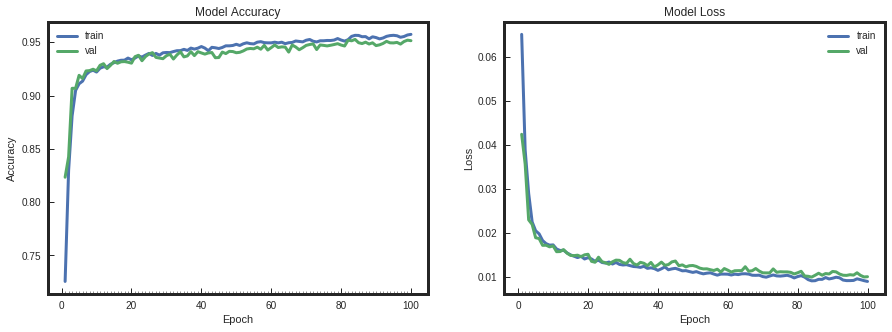

 Model took 216.88 seconds to train
Accuracy on test data is: 95.15


In [114]:
# decrease the learning rate
# define model
import keras
adamax_lr2 = keras.optimizers.Adamax(lr=0.01)
model_adamax_lr2 = simple_nn()
model_adamax_lr2.compile(optimizer=adamax_lr2, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr2 = model_adamax_lr2.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr2)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr2)

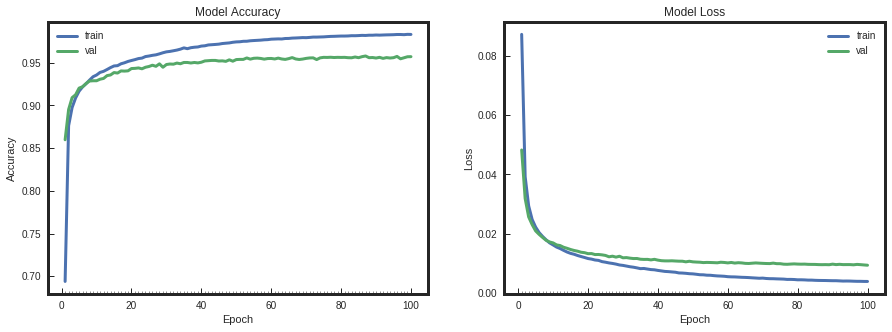

 Model took 161.09 seconds to train
Accuracy on test data is: 95.71


In [117]:
# decrease the learning rate
# define model
import keras
adamax_lr3 = keras.optimizers.Adamax(lr=0.001)
model_adamax_lr3 = simple_nn()
model_adamax_lr3.compile(optimizer=adamax_lr3, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr3 = model_adamax_lr3.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr3)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr3)

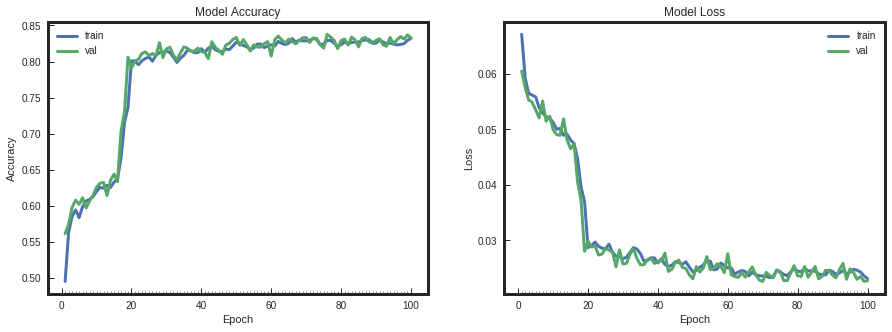

 Model took 327.13 seconds to train
Accuracy on test data is: 83.28


In [119]:
# decrease the learning rate
# define model
import keras
adamax_lr4 = keras.optimizers.Adamax(lr=0.1)
model_adamax_lr4 = simple_nn()
model_adamax_lr4.compile(optimizer=adamax_lr4, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr4 = model_adamax_lr4.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr4)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr4)

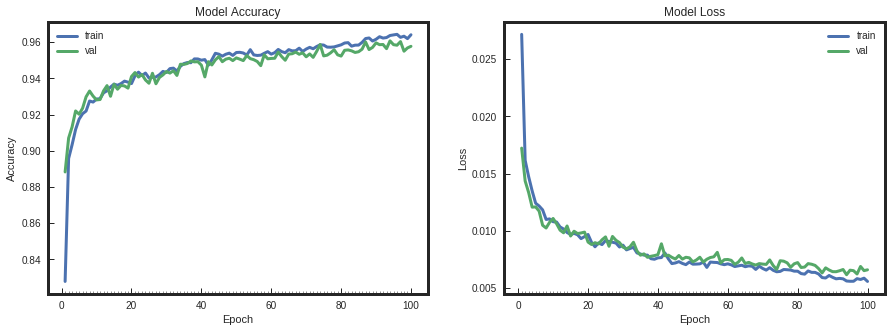

 Model took 208.68 seconds to train
Accuracy on test data is: 95.77


In [121]:
# decrease the learning rate
# define model
import keras
adamax_lr5 = keras.optimizers.Adamax(lr=0.01)
model_adamax_lr5 = simple_nn()
model_adamax_lr5.compile(optimizer=adamax_lr5, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr5 = model_adamax_lr5.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr5)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr5)

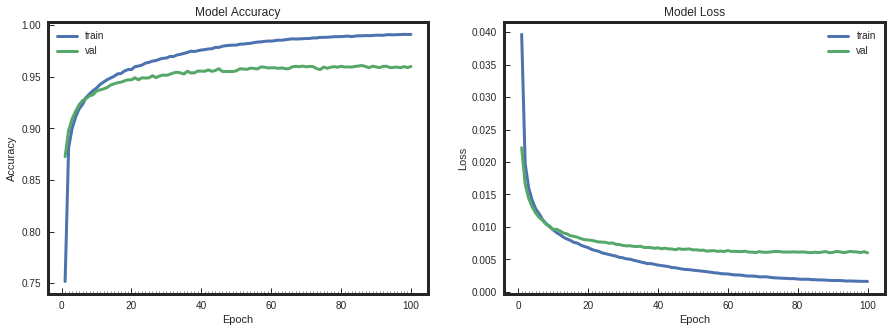

 Model took 148.24 seconds to train
Accuracy on test data is: 96.00


In [124]:
# decrease the learning rate
# define model
import keras
adamax_lr6 = keras.optimizers.Adamax(lr=0.001)
model_adamax_lr6 = simple_nn()
model_adamax_lr6.compile(optimizer=adamax_lr6, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr6 = model_adamax_lr6.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr6)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr6)

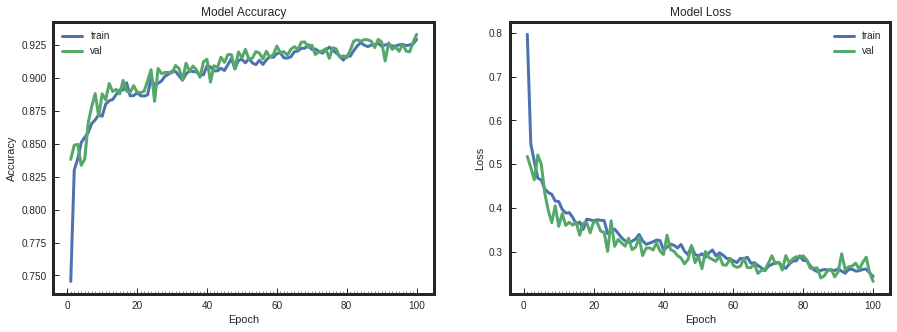

 Model took 280.57 seconds to train
Accuracy on test data is: 93.28


In [126]:
# decrease the learning rate
# define model
import keras
adamax_lr7 = keras.optimizers.Adamax(lr=0.1)
model_adamax_lr7 = simple_nn()
model_adamax_lr7.compile(optimizer=adamax_lr7, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr7 = model_adamax_lr7.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr7)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr7)

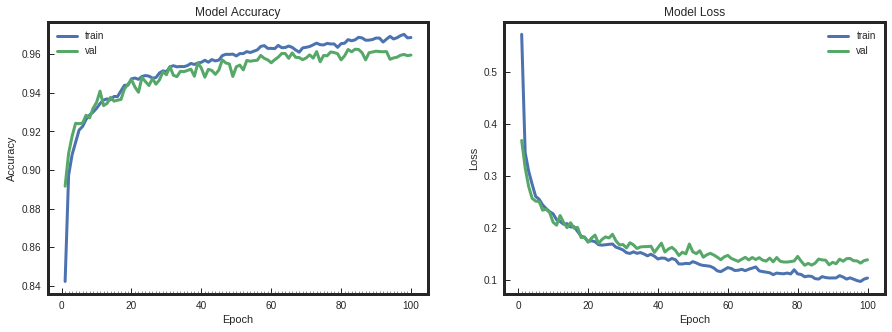

 Model took 183.22 seconds to train
Accuracy on test data is: 95.96


In [129]:
# decrease the learning rate
# define model
import keras
adamax_lr8 = keras.optimizers.Adamax(lr=0.01)
model_adamax_lr8 = simple_nn()
model_adamax_lr8.compile(optimizer=adamax_lr8, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr8 = model_adamax_lr8.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr8)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr8)

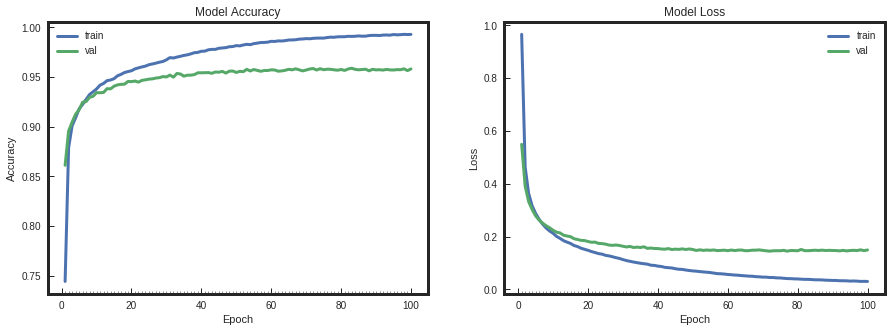

 Model took 165.88 seconds to train
Accuracy on test data is: 95.82


In [131]:
# decrease the learning rate
# define model
import keras
adamax_lr9 = keras.optimizers.Adamax(lr=0.001)
model_adamax_lr9 = simple_nn()
model_adamax_lr9.compile(optimizer=adamax_lr9, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_lr9 = model_adamax_lr9.fit(train_features, train_labels, batch_size=128, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_lr9)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr9)

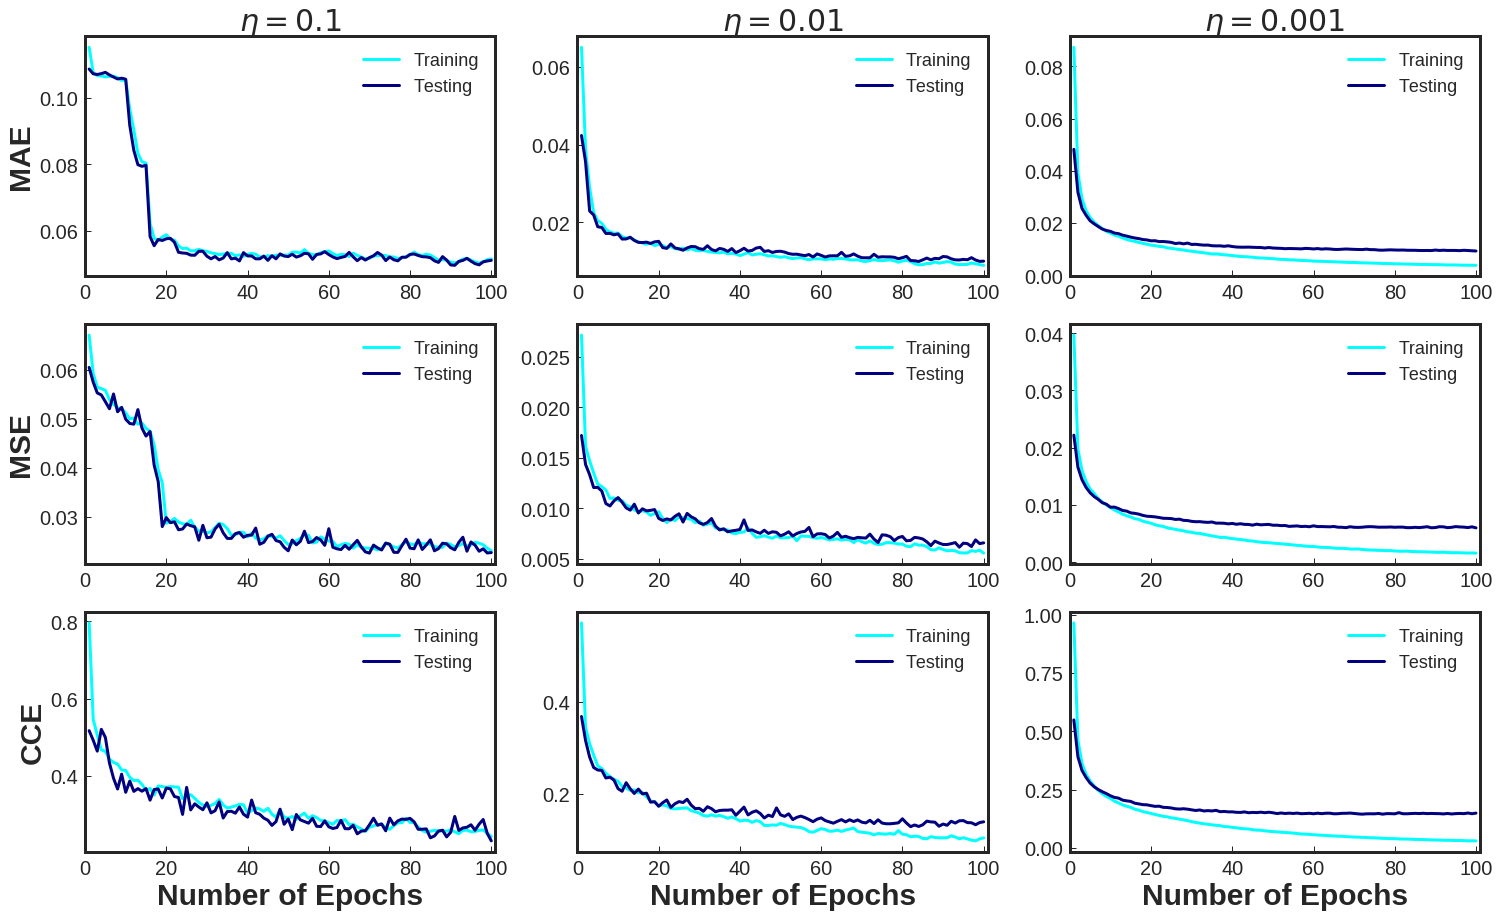

In [133]:
# learning effect - epochs
plt.figure(figsize=(25, 15))


plt.subplot(3,3,1)
plt.errorbar(range(1,len(model_info_adamax_lr01.history['loss'])+1),model_info_adamax_lr01.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr01.history['val_loss'])+1),model_info_adamax_lr01.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title(r"$\eta = 0.1$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("MAE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,2) 
plt.errorbar(range(1,len(model_info_adamax_lr2.history['loss'])+1),model_info_adamax_lr2.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr2.history['val_loss'])+1),model_info_adamax_lr2.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title(r"$\eta = 0.01$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.subplot(3,3,3) 
plt.errorbar(range(1,len(model_info_adamax_lr3.history['loss'])+1),model_info_adamax_lr3.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr3.history['val_loss'])+1),model_info_adamax_lr3.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title(r"$\eta = 0.001$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.subplot(3,3,4) 
plt.errorbar(range(1,len(model_info_adamax_lr4.history['loss'])+1),model_info_adamax_lr4.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr4.history['val_loss'])+1),model_info_adamax_lr4.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("MSE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,5) 
plt.errorbar(range(1,len(model_info_adamax_lr5.history['loss'])+1),model_info_adamax_lr5.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr5.history['val_loss'])+1),model_info_adamax_lr5.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,6) 
plt.errorbar(range(1,len(model_info_adamax_lr6.history['loss'])+1),model_info_adamax_lr6.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr6.history['val_loss'])+1),model_info_adamax_lr6.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,7) 
plt.errorbar(range(1,len(model_info_adamax_lr7.history['loss'])+1),model_info_adamax_lr7.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr7.history['val_loss'])+1),model_info_adamax_lr7.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("CCE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,8) 
plt.errorbar(range(1,len(model_info_adamax_lr8.history['loss'])+1),model_info_adamax_lr8.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr8.history['val_loss'])+1),model_info_adamax_lr8.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,9) 
plt.errorbar(range(1,len(model_info_adamax_lr9.history['loss'])+1),model_info_adamax_lr9.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_lr9.history['val_loss'])+1),model_info_adamax_lr9.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.savefig("./LR.png" ,bbox_inches='tight')
plt.show()# Plot with Error bars 


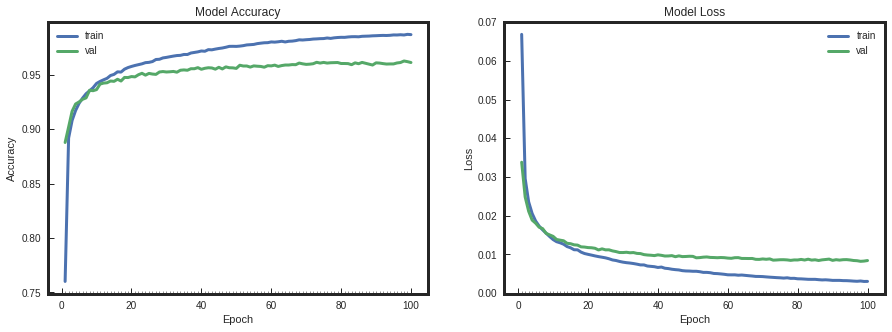

 Model took 526.42 seconds to train
Accuracy on test data is: 96.13


In [135]:
# decrease the learning rate
# define model
import keras
adamax_b1 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b1 = simple_nn()
model_adamax_b1.compile(optimizer=adamax_b1, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_b1 = model_adamax_b1.fit(train_features, train_labels, batch_size=16, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b1)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b1)

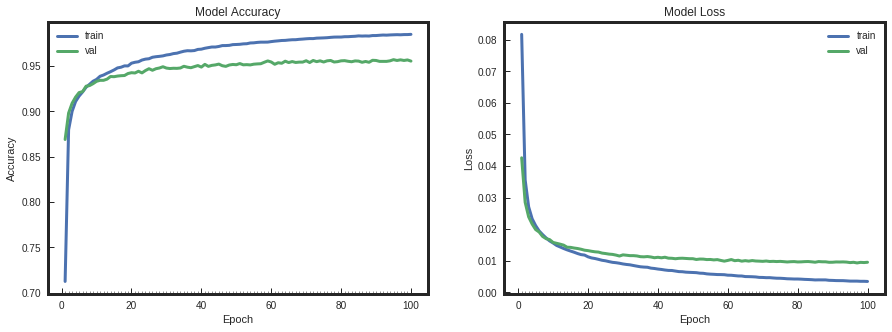

 Model took 207.72 seconds to train
Accuracy on test data is: 95.56


In [137]:
# decrease the learning rate
# define model
import keras
adamax_b2 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b2 = simple_nn()
model_adamax_b2.compile(optimizer=adamax_b2, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_b2 = model_adamax_b2.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b2)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b2)

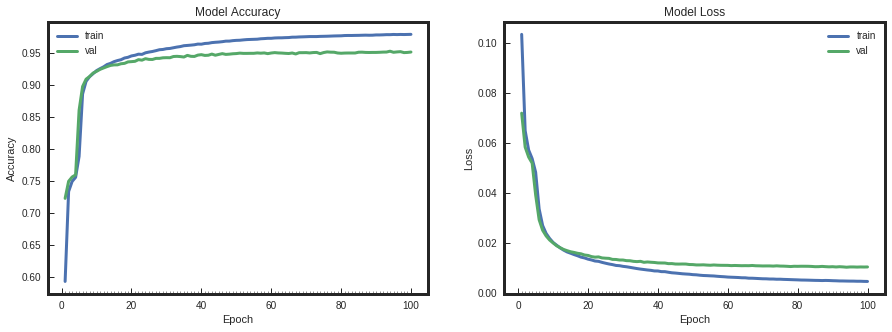

 Model took 135.38 seconds to train
Accuracy on test data is: 95.17


In [139]:
# decrease the learning rate
# define model
import keras
adamax_b3 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b3 = simple_nn()
model_adamax_b3.compile(optimizer=adamax_b3, loss='mae', metrics=['accuracy'])
start = time.time()
model_info_adamax_b3 = model_adamax_b3.fit(train_features, train_labels, batch_size=256, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b3)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b3)

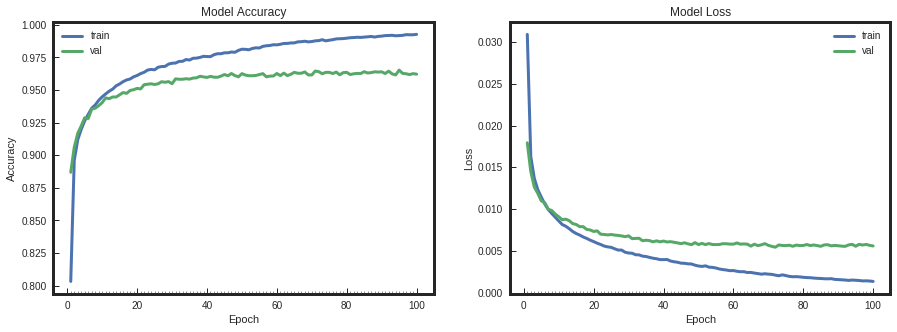

 Model took 518.54 seconds to train
Accuracy on test data is: 96.21


In [141]:
# decrease the learning rate
# define model
import keras
adamax_b4 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b4 = simple_nn()
model_adamax_b4.compile(optimizer=adamax_b4, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_b4 = model_adamax_b4.fit(train_features, train_labels, batch_size=16, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b4)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b4)

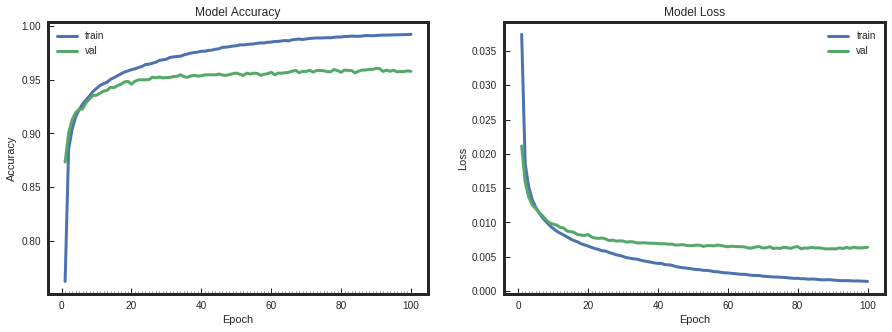

 Model took 201.08 seconds to train
Accuracy on test data is: 95.77


In [143]:
# decrease the learning rate
# define model
import keras
adamax_b5 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b5 = simple_nn()
model_adamax_b5.compile(optimizer=adamax_b5, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_b5 = model_adamax_b5.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b5)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy# decrease the learning rate
# define model
import keras
adamax_b5 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b5 = simple_nn()
model_adamax_b5.compile(optimizer=adamax_b5, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_b5 = model_adamax_b5.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b5)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b5)
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b5)

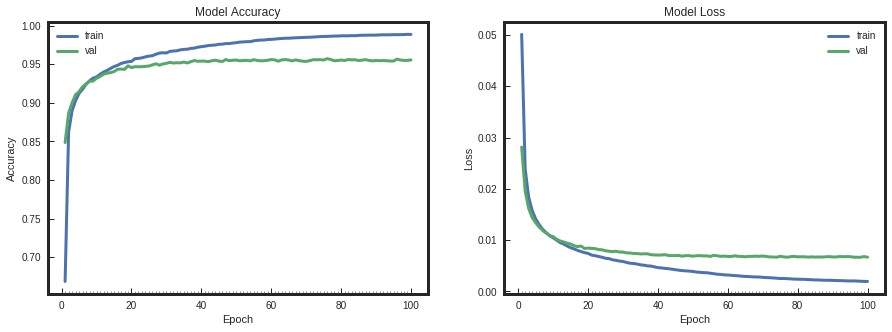

 Model took 122.64 seconds to train
Accuracy on test data is: 95.55


In [145]:
# decrease the learning rate
# define model
import keras
adamax_b6 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b6 = simple_nn()
model_adamax_b6.compile(optimizer=adamax_b6, loss='mse', metrics=['accuracy'])
start = time.time()
model_info_adamax_b6 = model_adamax_b6.fit(train_features, train_labels, batch_size=256, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b6)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b6)

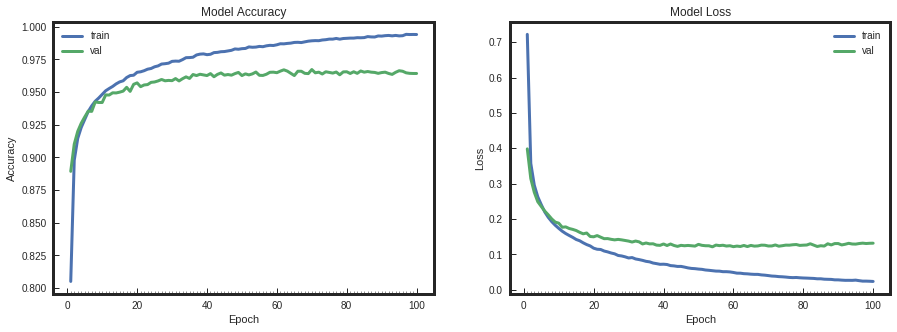

 Model took 1142.46 seconds to train
Accuracy on test data is: 96.42


In [150]:
# decrease the learning rate
# define model
import keras
adamax_b7 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b7 = simple_nn()
model_adamax_b7.compile(optimizer=adamax_b7, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_b7 = model_adamax_b7.fit(train_features, train_labels, batch_size=16, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b7)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b7)

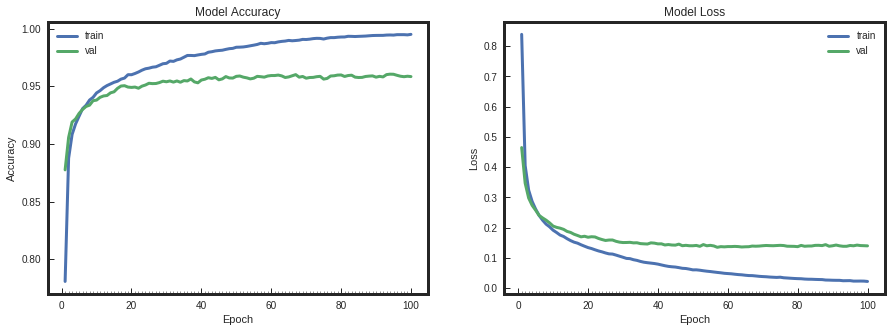

 Model took 611.61 seconds to train
Accuracy on test data is: 95.84


In [152]:
# decrease the learning rate
# define model
import keras
adamax_b8 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b8 = simple_nn()
model_adamax_b8.compile(optimizer=adamax_b8, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_b8 = model_adamax_b8.fit(train_features, train_labels, batch_size=64, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b8)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b8)

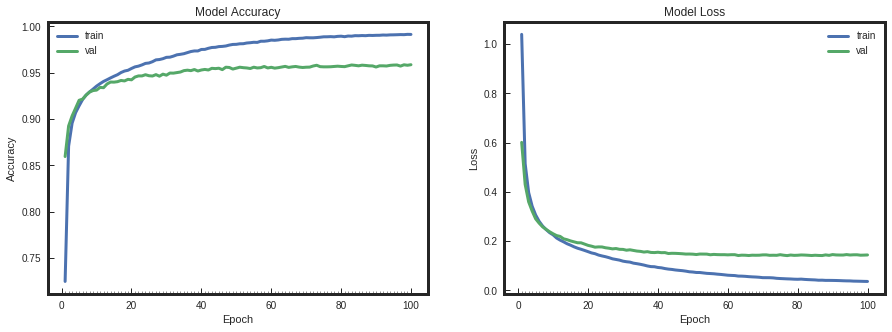

 Model took 332.20 seconds to train
Accuracy on test data is: 95.86


In [154]:
# decrease the learning rate
# define model
import keras
adamax_b9 = keras.optimizers.Adamax(lr=0.001)
model_adamax_b9 = simple_nn()
model_adamax_b9.compile(optimizer=adamax_b9, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info_adamax_b9 = model_adamax_b9.fit(train_features, train_labels, batch_size=256, \
                       nb_epoch=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()
# plot model history
plot_model_history(model_info_adamax_b9)
print " Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_b9)

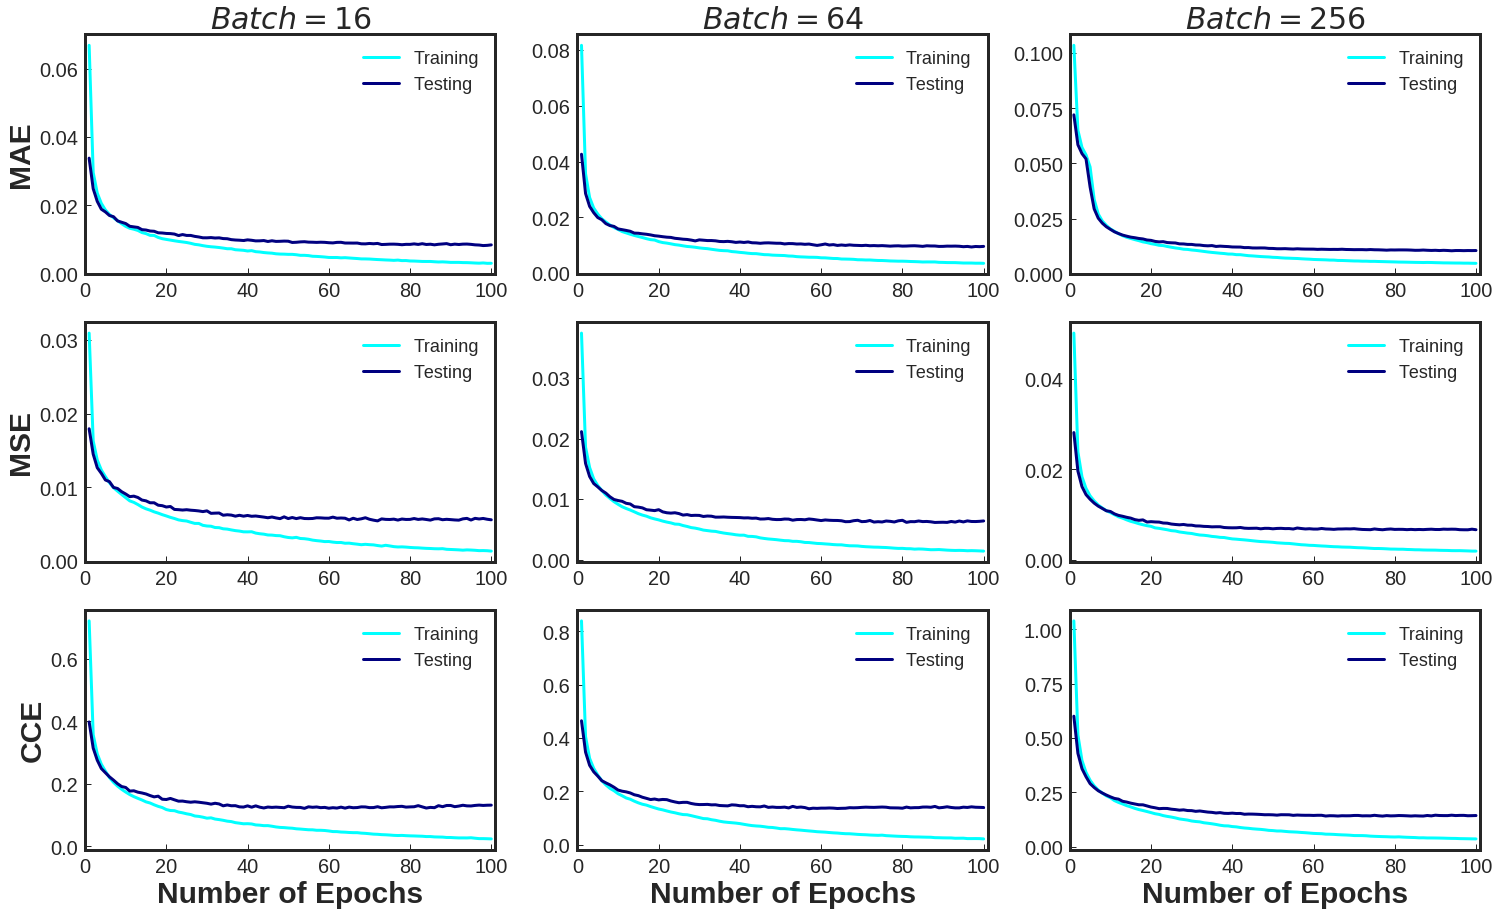

In [155]:
# batch size vs epochs
plt.figure(figsize=(25, 15))


plt.subplot(3,3,1)
plt.errorbar(range(1,len(model_info_adamax_b1.history['loss'])+1),model_info_adamax_b1.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b1.history['val_loss'])+1),model_info_adamax_b1.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title("$Batch = 16$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("MAE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,2) 
plt.errorbar(range(1,len(model_info_adamax_b2.history['loss'])+1),model_info_adamax_b2.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b2.history['val_loss'])+1),model_info_adamax_b2.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title("$Batch = 64$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,3) 
plt.errorbar(range(1,len(model_info_adamax_b3.history['loss'])+1),model_info_adamax_b3.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b3.history['val_loss'])+1),model_info_adamax_b3.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

plt.title("$Batch = 256$" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,4) 
plt.errorbar(range(1,len(model_info_adamax_b4.history['loss'])+1),model_info_adamax_b4.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b4.history['val_loss'])+1),model_info_adamax_b4.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("MSE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,5) 
plt.errorbar(range(1,len(model_info_adamax_b5.history['loss'])+1),model_info_adamax_b5.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b5.history['val_loss'])+1),model_info_adamax_b5.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,6) 
plt.errorbar(range(1,len(model_info_adamax_b6.history['loss'])+1),model_info_adamax_b6.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b6.history['val_loss'])+1),model_info_adamax_b6.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
# plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,7) 
plt.errorbar(range(1,len(model_info_adamax_b7.history['loss'])+1),model_info_adamax_b7.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b7.history['val_loss'])+1),model_info_adamax_b7.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
plt.ylabel("CCE" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)


plt.subplot(3,3,8) 
plt.errorbar(range(1,len(model_info_adamax_b8.history['loss'])+1),model_info_adamax_b8.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b8.history['val_loss'])+1),model_info_adamax_b8.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)



plt.subplot(3,3,9) 
plt.errorbar(range(1,len(model_info_adamax_b9.history['loss'])+1),model_info_adamax_b9.history['loss'] ,color = "cyan", linestyle = "-" , marker = "v" , label = "Training")
plt.errorbar(range(1,len(model_info_adamax_b9.history['val_loss'])+1),model_info_adamax_b9.history['val_loss'] ,color = "navy", linestyle = "-" , marker = "^" , label = "Testing")

# plt.title("Testing" ,  fontweight = "bold" , fontsize=30)

mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =3
plt.xlabel("Number of Epochs", fontweight = "bold" , fontsize=30)
# plt.ylabel("Loss" , fontweight = "bold" , fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim([0.75,1])
plt.xlim([0,101])
plt.legend( prop={'size':18} , loc = 1)

plt.savefig("./Batch.png" ,bbox_inches='tight')
plt.show()# Plot with Error bars 
